In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade geopandas pyshp shapely descartes rasterio

### Intact landscape

### Import libraries

In [ ]:
import io, requests, os, json

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.plot import show, show_hist
from rasterio.mask import mask

import matplotlib as mpl
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Land use

https://environment.govt.nz/facts-and-science/science-and-data/new-zealand-land-use-map/

In [ ]:
NZ_landuse.head(1)

,LUCID_2020,SUBID_2020,START_2020,LUCID_2016,SUBID_2016,START_2016,LUCID_2012,SUBID_2012,START_2012,LUCID_2007,...,START_2007,LUCID_1989,SUBID_1989,START_1989,MAP_YEAR,ISLAND_ID,LUM_REG_ID,AREA_HA,Shape_Leng,geometry
0,71 - Natural Forest,120 - Shrubland,NaN,71 - Natural Forest,120 - Shrubland,NaN,71 - Natural Forest,120 - Shrubland,NaN,71 - Natural Forest,...,NaN,71 - Natural Forest,120 - Shrubland,NaN,2020,1 - North Island,1 - Northland,1.978597,668.823782,"POLYGON ((1649204.899 6063968.201, 1649209.200..."


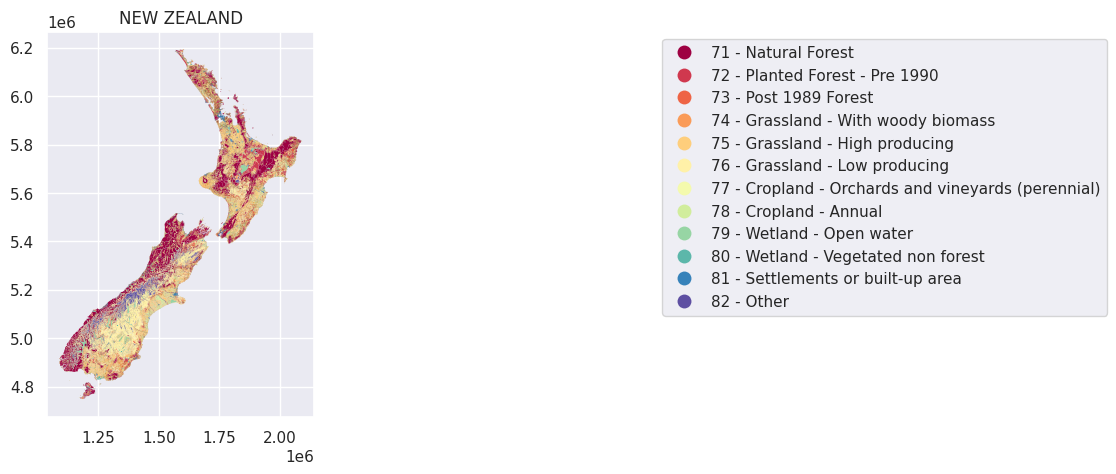

In [ ]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND')

NZ_landuse.plot(ax=ax, column='LUCID_2020', cmap=cmap, edgecolor='None', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((4, 1))  # (horizontal, vertical)

plt.show()

In [ ]:
NZ_natural = NZ_landuse[NZ_landuse['LUCID_2020'] == '71 - Natural Forest']

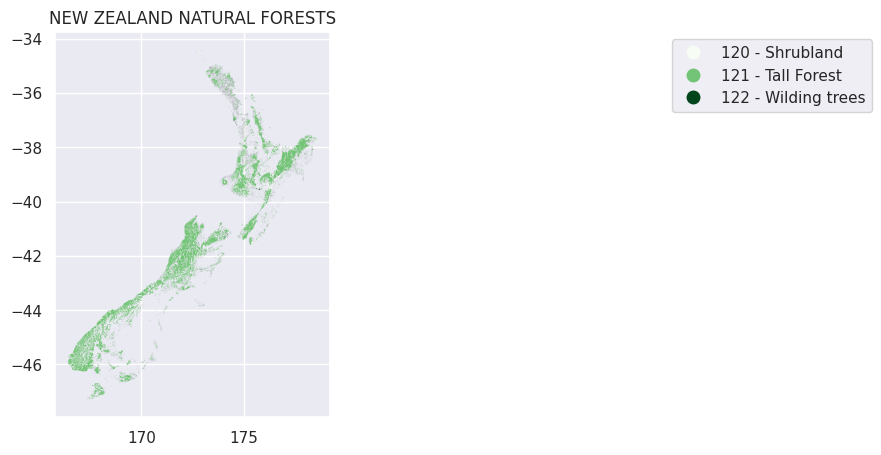

In [ ]:
cmap = 'Greens'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND NATURAL FORESTS')

NZ_natural.plot(ax=ax, column='SUBID_2020', cmap=cmap, edgecolor='None', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((3, 1))  # (horizontal, vertical)

plt.show()

In [ ]:
NZ_eco = gpd.read_file('/content/drive/MyDrive/geospatial/NZ_eco.shp')

In [ ]:
# Reproject CRS
if NZ_eco.crs != NZ_natural.crs:
    NZ_natural = NZ_natural.to_crs(NZ_eco.crs)

In [ ]:
NZ_forest_eco = NZ_eco.clip(NZ_natural)

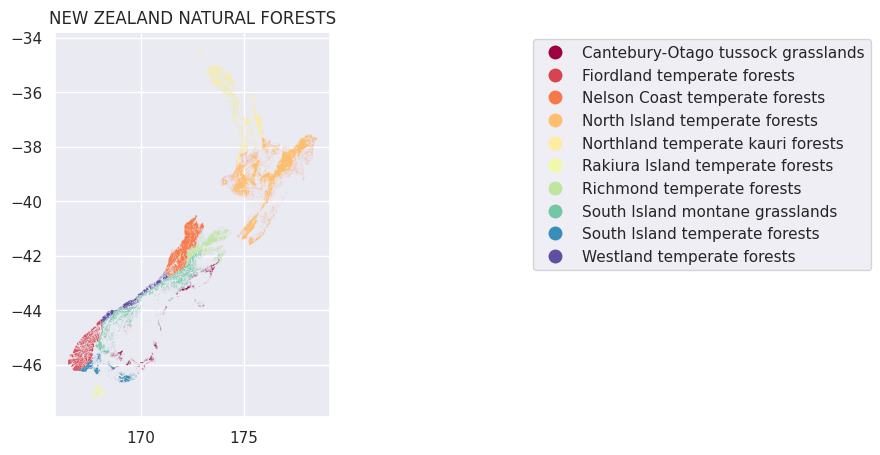

In [ ]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND NATURAL FORESTS')

NZ_forest_eco.plot(ax=ax, column='ECO_NAME', cmap=cmap, edgecolor='None', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((3, 1))  # (horizontal, vertical)

plt.show()

### Potential vegetation

https://catalogue.data.govt.nz/dataset/potential-vegetation-of-new-zealand

In [ ]:
# Reproject CRS
if NZ_eco.crs != NZ_veggies.crs:
    NZ_veggies = NZ_veggies.to_crs(NZ_eco.crs)

In [ ]:
# Clip
NZ_species = NZ_veggies.clip(NZ_natural)

### Other

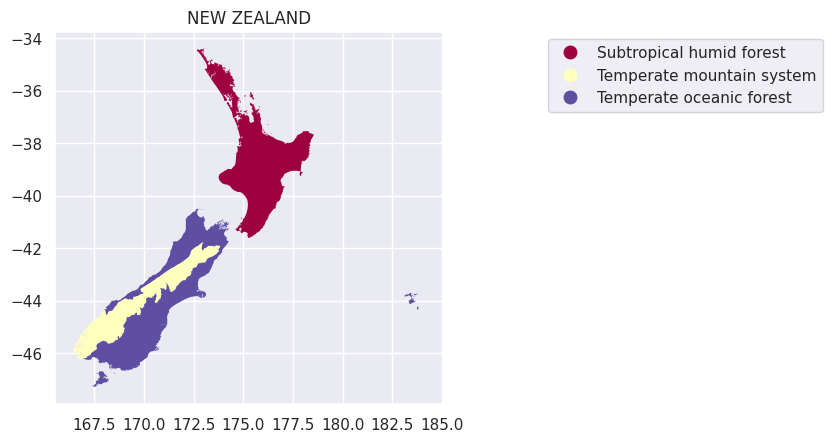

In [ ]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND')

newzealand.plot(ax=ax, column='gez_name', cmap=cmap, edgecolor='None', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1))  # (horizontal, vertical)

plt.show()

### Intact forest landscape

In [ ]:
intact = gpd.read_file('/content/drive/MyDrive/geospatial/ifl_2016.geojson')

In [ ]:
intact_NZ = intact.clip(newzealand)

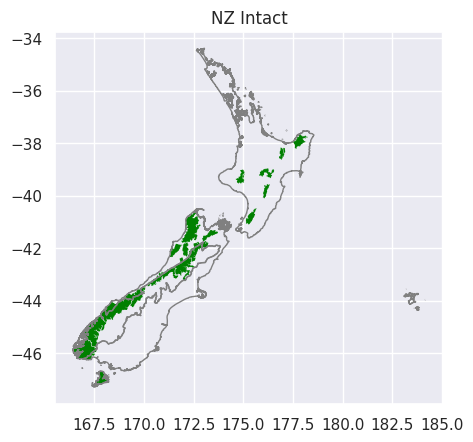

In [ ]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NZ Intact')

intact_NZ.plot(ax=ax, color='green', edgecolor='None', legend=True)
newzealand.plot(ax=ax, color='None', edgecolor='gray', legend=True)

# Move the legend to the right of the map
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((2.25, 1))  # (horizontal, vertical)

plt.show()

### Holdridge

In [ ]:
holdridge = gpd.read_file('/content/drive/MyDrive/geospatial/HoldridgeLifeZones.json')

In [ ]:
NZ_holdridge = holdridge.clip(newzealand)

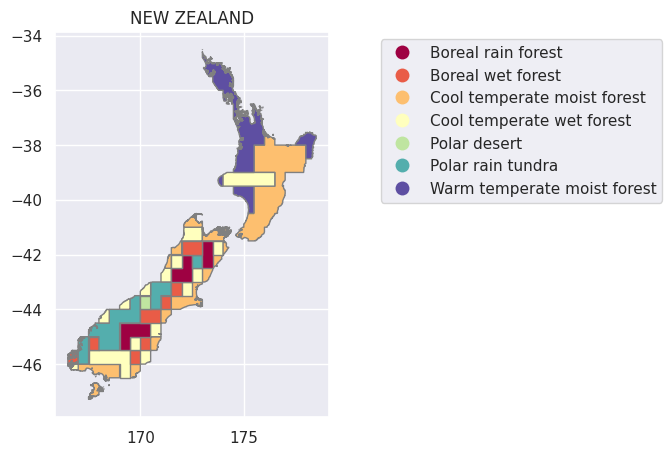

In [ ]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('NEW ZEALAND')

NZ_holdridge.plot(ax=ax, column='DESC', cmap=cmap, edgecolor='gray', legend=True)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((2.25, 1))  # (horizontal, vertical)

plt.show()